DOWNLOADING OF DATA , LINK IS [link](https://www.kaggle.com/datasets/cicdataset/cicids2017?resource=download)

## Pre Processing

####  The purpose of this program is to clear the csv files containing CICIDS2017 data from errors.
####  the faults observed are:
####      1-   288602 of the entries in the file "Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv" are empty / meaningless.
####                   (e.g. ",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,")
####
####      2-  In the original csv files, while describing the Web Attack types such as Brute Force, XSS, Sql Injection, the character used is not recognized
####                    by the Python-Pandas library and leads to the error.
####                   this character ("–", Unicode code:8211) has been changed with another character ("-", Unicode code:45) to correct the error.
####
####   After the error correction, all the csv files were made into a single file (all_date.csv) to make it easier to process.


In [ ]:
# IMPORTS OF MODULES
import pandas as pd
import os
from sklearn import preprocessing
import time
seconds = time.time()
%matplotlib inline

In [ ]:
print("This process may take 5 to 10 minutes, depending on the performance of your computer.\n\n\n")
number="0123456789"
# CSV files names:
csv_files=os.listdir('./DATA/') ## ALL DATA SHOULD BE UNDER THE FOLDER IN SAME DIRECTORY NAMED "DATA"

# HEADERS OF LABELS OF DATAFRAME
df = pd.read_csv('./DATA/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
main_labels = [x.strip() for x in df.columns.to_list()]

main_labels2=main_labels
main_labels=( ",".join( i for i in main_labels ) )
main_labels=main_labels+"\n"
main_labels
flag=True

for i in range(len(csv_files)):
    print('FILENAME :',str(csv_files[i]))
    ths = open(str(csv_files[i]), "w")
    ths.write(main_labels)
    with open("./DATA/"+csv_files[i], "r") as file:
        print('REMOVING THE inf,NaN and other errors')
        while True:
            try:
                line=file.readline()
                if  line[0] in number:# this line eliminates the headers of CSV files and incomplete streams .
                    if " – " in str(line): ##  if there is "–" character ("–", Unicode code:8211) in the flow ,  it will be chanced with "-" character ( Unicode code:45).
                        line=(str(line).replace(" – "," - "))
                    line=(str(line).replace("inf","0"))
                    line=(str(line).replace("Infinity","0"))
                    line=(str(line).replace("NaN","0"))
                    ths.write(str(line))
                else:
                    continue                       
            except:
                break
    ths.close()
 
    df=pd.read_csv(str(csv_files[i]),low_memory=False)
    df=df.fillna(0)
    
    string_features=["Flow Bytes/s","Flow Packets/s"]
    for ii in string_features: #Some data in the "Flow Bytes / s" and "Flow Packets / s" columns are not numeric. Fixing this bug in this loop
        df[ii]=df[ii].replace('Infinity', -1)
        df[ii]=df[ii].replace('NaN', 0)
        number_or_not=[]
        for iii in df[ii]:
            try:
                k=int(float(iii))
                number_or_not.append(int(k))
            except:
                number_or_not.append(iii)
        df[ii]=number_or_not



    string_features=[]
    for j in main_labels2: # In this section, non-numeric (string and / or categorical) properties (columns) are detected.
        if df[j].dtype=="object":
            string_features.append(j)
    try:
        string_features.remove('Label')#The "Label" property was removed from the list. Because it has to remain "categorical" for using with different machine learning approach.
    except:
        print("error!")
    labelencoder_X = preprocessing.LabelEncoder()


    print('LABEL ENCODING')
    for ii in string_features: ## In this loop, non-numeric (string and/or categorical) properties converted to numeric features.
        try:
            df[ii]=labelencoder_X.fit_transform(df[ii])
        except:
            df[ii]=df[ii].replace('Infinity', -1)
    df=df.drop(main_labels2[61], axis=1) ## Column 61 is deleted because it is unnecessary, column 41 ("Fwd Header Length" feature) had be mistakenly rewritten.


    print('MERGING INTO ONE FILE')
    ##All CSV files are merged into a single file.
    if flag:
        df.to_csv('all_data.csv' ,index = False)
        flag=False
    else:
        df.to_csv('all_data.csv' ,index = False,header=False,mode="a")
    #os.remove(str(csv_files[i]))
    print("The pre-processing phase of the ",csv_files[i]," file is completed.\n")
    

print("mission accomplished!")
print("Total operation time: = ",time.time()- seconds ,"seconds")

## STATISTICS OF THE DATA

###### The data will not be equally divided into labels which can make the model learn wrong as it always give more weight to BENIGN. To avoid that we will reduce the data

##### Also the data is too big to be used in this processor. So we will go for reduction of data option .  :-)
### Lets see the actual data.

In [ ]:
'''
  all_data.csv files is required for the operation of the program.
  all_data.csv file must be located in the same directory as the program.

  The purpose of this program is to provide statistics about the data contained in the dataset.
  Considering that some of the data are very large and some of them are very small, 
  the graphics are created in three separate groups, so that all data can be seen:
        big: labels with more than 11000 numbers
        medium: labels with numbers between 600 and 11000
        small: labels with fewer than 600 numbers
'''


import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
%matplotlib inline
import time
seconds = time.time()

#  graph creation function
def graph(objects,performance,x_label,y_label):
    y_pos = np.arange(len(objects))
    plt.barh(y_pos, performance, align='center', alpha=0.5)
    plt.yticks(y_pos, objects)
    plt.xlabel(x_label)
    plt.title(y_label)
    plt.show()

In [ ]:
## TIME TAKING CELL :(
df=pd.read_csv('all_data.csv', usecols=["Label"])
print(df.iloc[:,0].value_counts())
a=(df.iloc[:,0].value_counts())

In [ ]:
## WHOLE DATA IS FAVOURING THE BENIGN label... 
key=a.keys()
values=a.values
small_labels=[]
small_values=[]
big_labels=[]
big_values=[]
medium_labels=[]
medium_values=[]
attack=0
benign=0

## the attacks are grouped under 3 groups,
## so that all values can be seen on the graph.
for i in range(0,len(values)):
    if values[i]>11000:
        big_labels.append(str(key[i]))
        big_values.append(values[i])
    elif values[i]<600:
        small_labels.append(str(key[i]))
        small_values.append(values[i]) 
    else:
        medium_labels.append(str(key[i]))
        medium_values.append(values[i])

    if str(key[i])=="BENIGN":
        benign+=values[i]
    else:
        attack+=values[i]
        
key =[benign,attack]

print('There are total attacks :',attack,'out of total data of',attack+benign)

#functions are called to create a chartes
labels=["BENIGN %"+str(round(benign/(benign+attack),2)*100),
        "ATTACK %"+str(round(attack/(benign+attack),2)*100)]
print(labels[0])
print(labels[1])
graph(big_labels,big_values,"Numbers","Attacks Labels - High-number group")
graph(medium_labels,medium_values,"Numbers","Attacks Labels - Medium-number group")
graph(small_labels,small_values,"Numbers","Attacks Labels - Small -number group")
graph(labels,key,"Numbers","Attack and Benign Percentage")



print("mission accomplished!")
print("Total operation time: = ",time.time()- seconds ,"seconds")

## Data Reduction (balanced data formation)

In [ ]:
'''
        The purpose of this program is to produce CSV files consisting of only one type of attack and benign flow.
        These files contain all attack flow and some benign data flow. The rate : (attack= 30% , benign=70%) 
        normal data streams are randomly selected
'''
import random
import os
import pandas as pd
import time
%matplotlib inline

def folder(f_name): 
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print ("Tthe folder could not be created!")

In [ ]:
# HEADERS OF LABELS OF DATAFRAME
df = pd.read_csv('./DATA/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
main_labels = [x.strip() for x in df.columns.to_list()]
main_labels=( ",".join( i for i in main_labels ) )

In [ ]:
df=pd.read_csv('all_data.csv', usecols=["Label"]) ## use columns is used so that we dont load huge data into ram :)
attacks = df['Label'].unique().tolist()
folder('./attacks/')

In [ ]:
dict_attack = df.Label.value_counts().to_dict()

In [ ]:
print("This process may take 3 to 8 minutes, depending on the performance of your computer.\n\n\n")
seconds = time.time()

for i in dict_attack: 
    if i == 'BENIGN':
        continue ## to skip the benign part....
    # in this section, a file is opened for each attack type and is recorded at a random benign flow.
    a,b=0,0
    ths = open("./attacks/"+i + ".csv", "w")
    ths.write(str(main_labels)+"\n")
    benign_num=int(dict_attack['BENIGN']/(dict_attack[i]*(7/3)))
    with open("all_data.csv", "r") as file:
        while True:
            try:
                line=file.readline()
                line=line[:-1]
                k=line.split(",")
                if k[83]=="BENIGN":
                    rnd=random.randint(1,benign_num)
                    if rnd==1:
                            ths.write(str(line)+"\n")
                            b+=1
                if  k[83]==i:
                    ths.write(str(line)+"\n")
                    a+=1
                else:
                    continue                       
            except:
                break
    ths.close()
    print(i ,"file is completed\n attack:%d\n benign:%d\n\n\n " %(a,b))

print("mission accomplished!")
print("operation time: = ",time.time()- seconds ,"seconds")

### Feature Selection (if required)

In [1]:
'''
    the purpose of this code is to determine which features to use in the machine learning phase.
    for this purpose, the importance weights of the attacks are calculated.
    this calculation was made using sklearn-RandomForestRegressor.
'''
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor
import sklearn as sk
import time

## important functions
def folder(f_name): #this function creates a folder named "feaure_pics" in the program directory.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print ("The folder could not be created!")
        
# CSV files names:
csv_files=os.listdir("attacks")# It creates a list of file names in the "attacks" folder.

# HEADERS OF LABELS OF DATAFRAME
df = pd.read_csv('./DATA/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
main_labels = [x.strip() for x in df.columns.to_list()]

**SSH-Patator.csv**
SSH-Patator importance list:
SSH-Patator 
                              importance
Features                               
Flow Duration                  0.001293
Fwd Packet Length Min          0.000794
Flow IAT Std                   0.000525
Total Fwd Packets              0.000523
Flow IAT Min                   0.000472
Flow Packets/s                 0.000457
Flow IAT Mean                  0.000355
Total Length of Bwd Packets    0.000327
Fwd Packet Length Std          0.000294
Bwd Packet Length Max          0.000158
Flow IAT Max                   0.000119
Total Length of Fwd Packets    0.000091
Bwd Packet Length Std          0.000084
Fwd Packet Length Mean         0.000062
Total Backward Packets         0.000055
Flow Bytes/s                   0.000043
Bwd Packet Length Min          0.000042
Fwd Packet Length Max          0.000032
Bwd Packet Length Mean         0.000018
Destination Port               0.000000 



SSH-Patator=["Flow Duration","Fwd Packet Length Min",

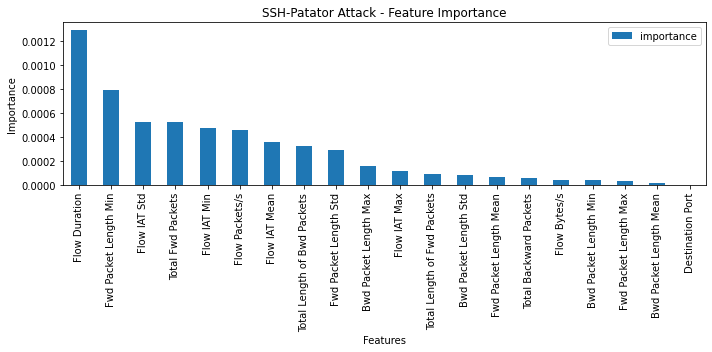

-----------------------------------------------------------------------------------------------




**Heartbleed.csv**
Heartbleed importance list:
Heartbleed 
                              importance
Features                               
Total Length of Fwd Packets       0.068
Bwd Packet Length Min             0.056
Total Backward Packets            0.052
Flow Bytes/s                      0.040
Fwd Packet Length Max             0.040
Bwd Packet Length Std             0.040
Total Fwd Packets                 0.028
Total Length of Bwd Packets       0.028
Fwd Packet Length Min             0.020
Destination Port                  0.000
Flow IAT Max                      0.000
Flow IAT Std                      0.000
Flow IAT Mean                     0.000
Flow Packets/s                    0.000
Bwd Packet Length Max             0.000
Bwd Packet Length Mean            0.000
Flow Duration                     0.000
Fwd Packet Length Std             0.000
Fwd Packet Length Mean            0.000


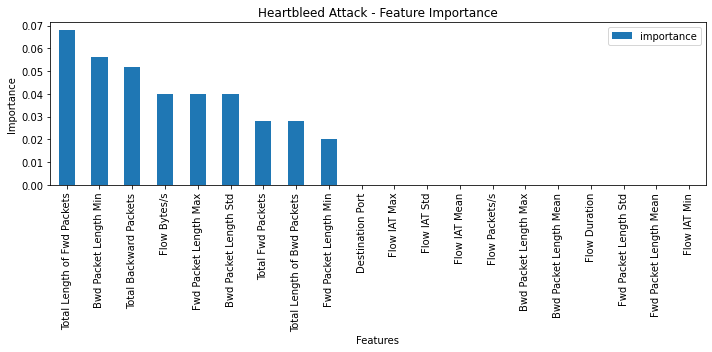

-----------------------------------------------------------------------------------------------




**DoS GoldenEye.csv**
DoS GoldenEye importance list:
DoS GoldenEye 
                              importance
Features                               
Flow Bytes/s                   0.584032
Flow Duration                  0.070888
Flow IAT Max                   0.025306
Flow IAT Std                   0.021174
Fwd Packet Length Mean         0.001506
Flow IAT Min                   0.000732
Total Fwd Packets              0.000705
Flow IAT Mean                  0.000579
Total Length of Fwd Packets    0.000120
Fwd Packet Length Max          0.000059
Bwd Packet Length Std          0.000043
Bwd Packet Length Min          0.000040
Fwd Packet Length Min          0.000038
Flow Packets/s                 0.000038
Fwd Packet Length Std          0.000036
Total Backward Packets         0.000028
Total Length of Bwd Packets    0.000025
Destination Port               0.000015
Bwd Packet Length Mean         

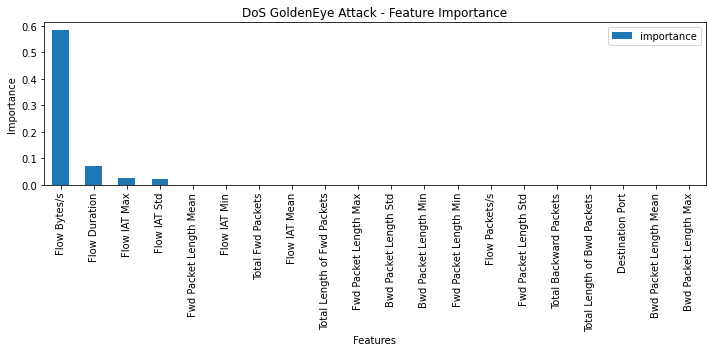

-----------------------------------------------------------------------------------------------




**Infiltration.csv**
Infiltration importance list:
Infiltration 
                              importance
Features                               
Fwd Packet Length Std          0.120894
Total Length of Bwd Packets    0.095433
Bwd Packet Length Max          0.053618
Fwd Packet Length Min          0.032876
Flow Duration                  0.014416
Total Backward Packets         0.012136
Total Fwd Packets              0.009244
Flow IAT Std                   0.008724
Bwd Packet Length Min          0.006041
Bwd Packet Length Std          0.004555
Total Length of Fwd Packets    0.004407
Flow Packets/s                 0.003919
Flow IAT Min                   0.003606
Flow IAT Max                   0.003235
Flow Bytes/s                   0.002985
Flow IAT Mean                  0.002877
Bwd Packet Length Mean         0.000684
Fwd Packet Length Mean         0.000551
Fwd Packet Length Max          0.0

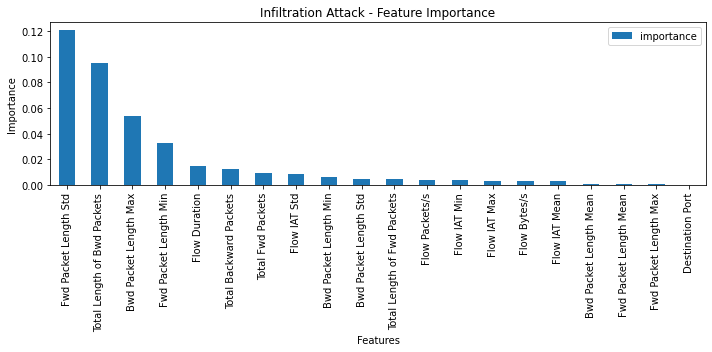

-----------------------------------------------------------------------------------------------




**FTP-Patator.csv**
FTP-Patator importance list:
FTP-Patator 
                              importance
Features                               
Bwd Packet Length Max          0.141524
Fwd Packet Length Min          0.080117
Fwd Packet Length Std          0.014751
Bwd Packet Length Std          0.000950
Flow Duration                  0.000662
Fwd Packet Length Max          0.000553
Fwd Packet Length Mean         0.000475
Bwd Packet Length Min          0.000152
Total Fwd Packets              0.000148
Total Backward Packets         0.000134
Total Length of Bwd Packets    0.000093
Flow Bytes/s                   0.000081
Total Length of Fwd Packets    0.000073
Flow IAT Min                   0.000073
Flow IAT Mean                  0.000027
Flow IAT Max                   0.000021
Flow IAT Std                   0.000013
Flow Packets/s                 0.000006
Bwd Packet Length Mean         0.0000

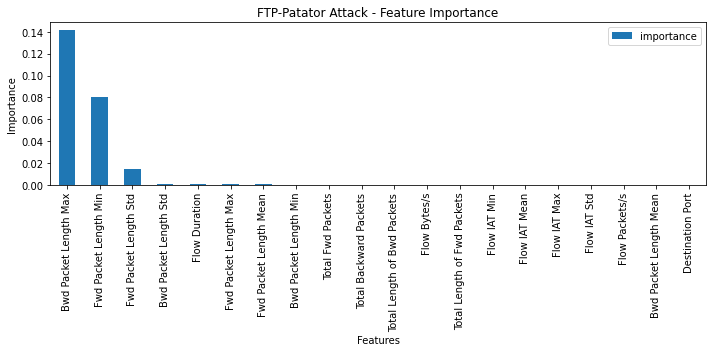

-----------------------------------------------------------------------------------------------




**DoS Hulk.csv**


KeyboardInterrupt: 

In [2]:
seconds = time.time()
ths = open("importance_list_for_attack_files.csv", "w")
folder("./feaure_pics/")
for j in csv_files:
    print('**'+j+'**')
    df=pd.read_csv("./attacks/"+j)
    df=df.fillna(0)
    attack_or_not=[]
    for i in df["Label"]:#it changes the normal label to "1" and the attack tag to "0" for use in the machine learning algorithm
        if i =="BENIGN":
            attack_or_not.append(1)
        else:
            attack_or_not.append(0)           
    df["Label"]=attack_or_not

    y = df["Label"].values
    del df["Label"]
    X = df.values
    
    X = np.float32(X)
    X[np.isnan(X)] = 0
    X[np.isinf(X)] = 0
   

    #computing the feature importances
    forest = sk.ensemble.RandomForestRegressor(n_estimators=250,random_state=0)
    forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
    indices = np.argsort(importances)[::-1]
    refclasscol=list(df.columns.values)
    impor_bars = pd.DataFrame({'Features':refclasscol[0:20],'importance':importances[0:20]})
    impor_bars = impor_bars.sort_values('importance',ascending=False).set_index('Features')
    plt.rcParams['figure.figsize'] = (10, 5)
    impor_bars.plot.bar();
    #printing the feature importances  
    count=0
    fea_ture=j[0:-4]+"=["
    for i in impor_bars.index:
        fea_ture=fea_ture+"\""+str(i)+"\","
        count+=1
        if count==5:
            fea_ture=fea_ture[0:-1]+"]"
            break     
    print(j[0:-4],"importance list:")
    print(j[0:-4],"\n",impor_bars.head(20),"\n\n\n")
    print(fea_ture)
    plt.title(j[0:-4]+" Attack - Feature Importance")
    plt.ylabel('Importance')
    plt.savefig("./feaure_pics/"+j[0:-4]+".pdf",bbox_inches='tight', orientation = 'portrait', format = 'pdf')
    ths.write((  fea_ture ) )
    plt.tight_layout()
    plt.show()
    print("-----------------------------------------------------------------------------------------------\n\n\n\n")

    
print("mission accomplished!")
print("Total operation time: = ",time.time()- seconds ,"seconds")
ths.close()

## Since all the important labels for different attacks are different, we will use combined of them and all of them for our model